# Importing the necessary libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

C:\Users\KESHAB CHANDRA DAS\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Load the dataset

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

Here we see there are 50000 training images and 1000 test images

In [4]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array

In [5]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [6]:
y_test = y_test.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [8]:
#plotting random images
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

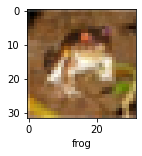

In [9]:
plot_sample(X_train, y_train, 0)

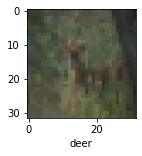

In [10]:
plot_sample(X_train, y_train, 10)

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

# Normalizing the training data

In [11]:
X_train = X_train / 255.0
X_test = X_test / 255.0

# Build simple artificial neural network for image classification

In [12]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 46s 27ms/step - loss: 1.8112 - accuracy: 0.3551
Epoch 2/5
1563/1563 [==============================] - 41s 26ms/step - loss: 1.6229 - accuracy: 0.4252
Epoch 3/5
1563/1563 [==============================] - 42s 27ms/step - loss: 1.5411 - accuracy: 0.4565
Epoch 4/5
1563/1563 [==============================] - 43s 27ms/step - loss: 1.4784 - accuracy: 0.4773
Epoch 5/5
1563/1563 [==============================] - 42s 27ms/step - loss: 1.4307 - accuracy: 0.4981


ANN is giving only 49% accuracy after 5 epochs

ANN is performing very bad.So we should try CNN

In [13]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 3s 9ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.65      0.42      0.51      1000
           1       0.62      0.57      0.59      1000
           2       0.39      0.34      0.36      1000
           3       0.41      0.24      0.30      1000
           4       0.55      0.22      0.32      1000
           5       0.36      0.45      0.40      1000
           6       0.44      0.69      0.54      1000
           7       0.61      0.47      0.53      1000
           8       0.58      0.66      0.62      1000
           9       0.39      0.73      0.51      1000

    accuracy                           0.48     10000
   macro avg       0.50      0.48      0.47     10000
weighted avg       0.50      0.48      0.47     10000



# Building Convolutional Neural Network

In [14]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [15]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 74s 46ms/step - loss: 1.4328 - accuracy: 0.4843
Epoch 2/10
1563/1563 [==============================] - 61s 39ms/step - loss: 1.0856 - accuracy: 0.6208
Epoch 3/10
1563/1563 [==============================] - 101s 65ms/step - loss: 0.9592 - accuracy: 0.6644
Epoch 4/10
1563/1563 [==============================] - 76s 49ms/step - loss: 0.8812 - accuracy: 0.6944
Epoch 5/10
1563/1563 [==============================] - 77s 49ms/step - loss: 0.8185 - accuracy: 0.7168
Epoch 6/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.7590 - accuracy: 0.7365
Epoch 7/10
1563/1563 [==============================] - 225s 144ms/step - loss: 0.7101 - accuracy: 0.7496
Epoch 8/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.6644 - accuracy: 0.7675
Epoch 9/10
1563/1563 [==============================] - 76s 49ms/step - loss: 0.6230 - accuracy: 0.7829
Epoch 10/10
1563/1563 [==============================] - 65s 

With CNN, at the end 5 epochs, accuracy was at around 70% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features

In [17]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 3s 6ms/step - loss: 0.9556 - accuracy: 0.6905


[0.9555878043174744, 0.690500020980835]

In [18]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 2s 5ms/step


array([[4.2478758e-04, 1.2697753e-03, 9.3162963e-03, 7.9404724e-01,
        5.8121772e-05, 1.0379722e-01, 7.4498497e-02, 3.8724982e-05,
        1.4248326e-02, 2.3009551e-03],
       [6.2802096e-04, 7.1193904e-01, 2.1613805e-07, 1.3467196e-06,
        1.1114560e-07, 4.8908333e-08, 4.0091427e-07, 1.0008787e-07,
        2.8411600e-01, 3.3147032e-03],
       [9.9475160e-02, 5.0352722e-02, 1.2142438e-03, 2.8156566e-03,
        9.7754579e-03, 5.3593569e-04, 3.8118000e-05, 5.1516748e-04,
        8.1200373e-01, 2.3273693e-02],
       [7.4218297e-01, 6.5544653e-03, 3.8202899e-04, 3.4650014e-04,
        1.2871709e-03, 3.6139538e-06, 6.8923843e-04, 6.5608410e-06,
        2.4781115e-01, 7.3623867e-04],
       [4.1326774e-07, 2.6254286e-06, 2.3248112e-02, 3.8339072e-01,
        1.1651916e-02, 3.7895057e-02, 5.4374915e-01, 6.6500702e-06,
        5.5228455e-05, 9.5839397e-08]], dtype=float32)

In [19]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 1, 8, 0, 6]

In [20]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

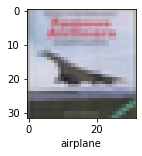

In [21]:
plot_sample(X_test, y_test,3)

In [23]:
classes[y_classes[3]]

'airplane'